# Get the data

In [ ]:
!unzip "/content/Churn Rate Prediction.zip"

Archive:  /content/Churn Rate Prediction.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        
  inflating: dataset/sample_submission.csv  


# Load the Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Training and testing set
train = pd.read_csv("/content/dataset/train.csv")
test = pd.read_csv("/content/dataset/test.csv")

In [ ]:
train.head(n = 20)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,06:46:07,23,433.62,13884.77,24.0,722.270000,Yes,No,Yes,Unsolved,No reason specified,3
6,fffe43004900440031003100360037003900,Bridget Balog,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10,55.38,8982.50,28.0,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,3
7,fffe4300490044003800300035003800,Herma Torgeson,42,M,4UJ1551,NaN,No Membership,2016-07-12,?,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,07:52:43,19,429.11,44554.82,24.0,568.080000,No,Yes,Yes,Unsolved,Poor Product Quality,5
8,fffe43004900440033003300330032003200,Pattie Helmers,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,06:50:10,15,191.07,18362.31,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
9,fffe43004900440032003000340038003300,Shaquana Leech,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,19:10:16,10,97.31,19244.16,28.0,706.230000,No,Yes,Yes,No Information Available,Poor Customer Service,4


In [ ]:
# Check for Nan values
train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
# Check for null values in test set
test.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [ ]:
# Split the training data into X and Y and then club X with test data for preprocessing
X = train.drop('churn_risk_score', axis = 1)
y = train['churn_risk_score']

# Complete data
data = pd.concat((X, test), axis = 0)

In [ ]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [ ]:
data['joined_through_referral'].value_counts()

Yes    24332
No     24143
?       8436
Name: joined_through_referral, dtype: int64

In [ ]:
data['medium_of_operation'].value_counts()

Desktop       21376
Smartphone    21281
?              8357
Both           5897
Name: medium_of_operation, dtype: int64

In [ ]:
# ? val is observed in these two columns
data['joined_through_referral'] = data['joined_through_referral'].str.replace('?','Not Known')
data['medium_of_operation'] = data['medium_of_operation'].str.replace('?', 'Not Known')

In [ ]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Not Known,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Not Known,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [ ]:
data.shape

(56911, 24)

In [ ]:
data.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 8376
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            447
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                5406
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


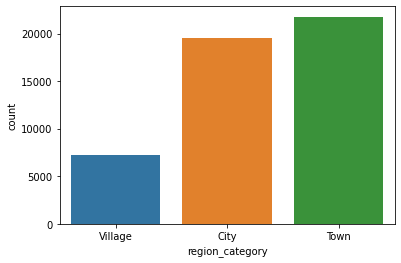

In [ ]:
# Visualise region_category feature
sns.countplot(data['region_category'])
plt.show()

In [ ]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Not Known,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Not Known,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [ ]:
# Check unique values in Name
data['Name'].value_counts().sort_values()

Cecile Voisine       1
Meghann Breneman     1
Sherie Wolken        1
Todd Swope           1
Jennell Genovese     1
                    ..
Vaughn Krings        1
Paulene Rudloff      1
Princess Hiemstra    1
Cedrick Shears       1
Bert Enciso          1
Name: Name, Length: 56911, dtype: int64

**Inference: Every name occurs only once.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


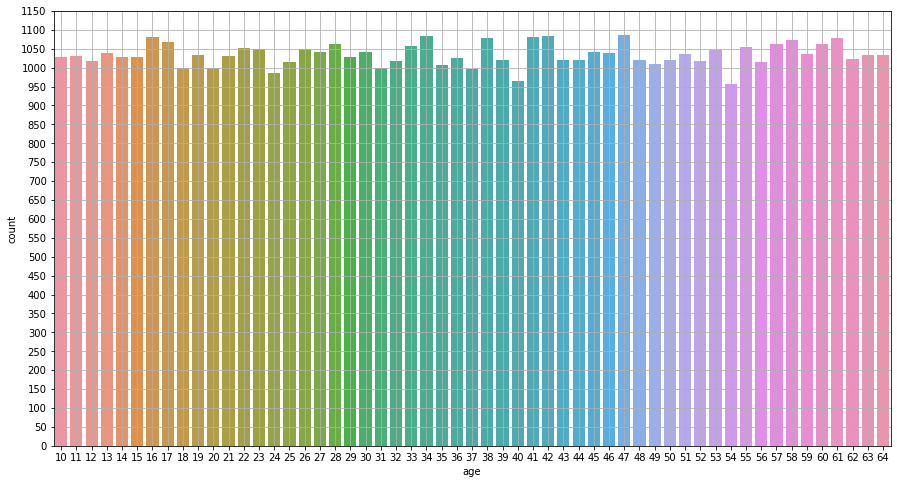

In [ ]:
# plot the age graph
plt.figure(figsize = (15,8))
sns.countplot(data['age'])
plt.yticks(np.arange(0,1200,50))
plt.grid()
plt.show()

**Almost uniform representation of age in the data.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


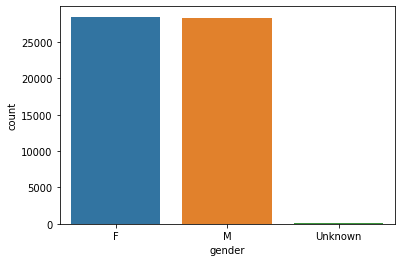

In [ ]:
# Check the distribution of Gender
sns.countplot(data['gender'])
plt.show()

**Equal representation of Gender.**

In [ ]:
# Check value counts for security_no
data['security_no'].value_counts().sort_values()

TK78C29    1
11MKKQ8    1
ZTE9RN8    1
V4J9QXK    1
KXPN1FG    1
          ..
VGSZXKG    1
5Z8ONFR    1
XUZ4W4W    1
Y0ASPCC    1
A5CJHUH    1
Name: security_no, Length: 56911, dtype: int64

Town       21763
City       19529
Village     7243
Name: region_category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


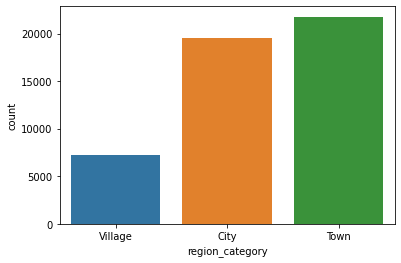

In [ ]:
# Check value counts for region_category
print(data['region_category'].value_counts())

# Plot the region_category
sns.countplot(data['region_category'])
plt.show()

In [ ]:
print("Number of Null values {}".format(data['region_category'].isnull().sum()))

Number of Null values 8376


In [ ]:
data['region_category']

0        Village
1           City
2           Town
3           City
4           City
          ...   
19914        NaN
19915    Village
19916       Town
19917       City
19918       Town
Name: region_category, Length: 56911, dtype: object

In [ ]:
# Check value counts for membership category
data['membership_category'].value_counts()

No Membership          11815
Basic Membership       11808
Gold Membership        10545
Silver Membership       9187
Premium Membership      6820
Platinum Membership     6736
Name: membership_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


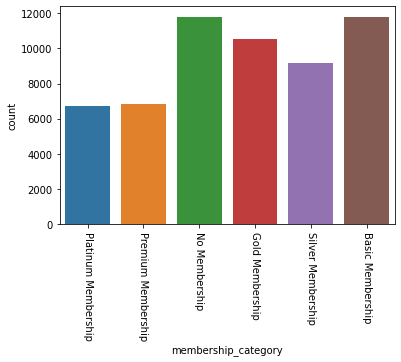

In [ ]:
# Visualise the categories
sns.countplot(data['membership_category'])
plt.xticks(rotation = -90)
plt.show()

**Inference: More occurence of Basic Membership and No Membership is found followed by Gold Membership, Silver Membership, Platinum and Premium Membership.**

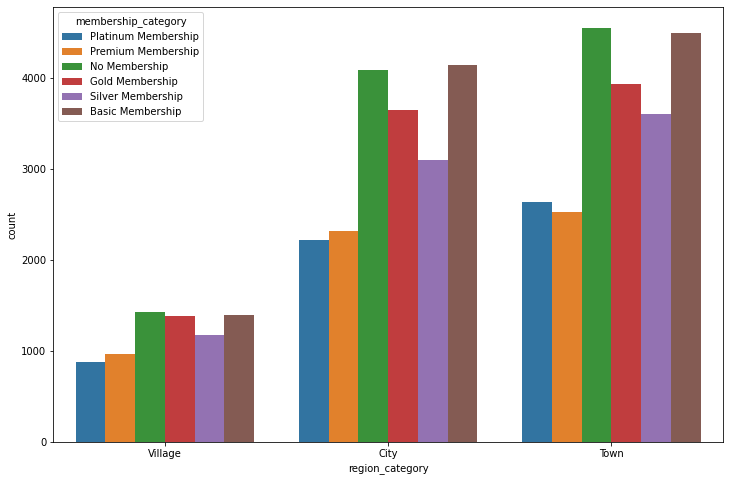

In [ ]:
# Plot the count plot for region category setting hue as membership
plt.figure(figsize=(12,8))
sns.countplot(data = data, x = 'region_category', hue = 'membership_category')
plt.show()

**Nothing conclusive can be said from the above plots.**

In [ ]:
data['joining_date'] = pd.to_datetime(data['joining_date']) # Convert into Datetime

# Extract datetime features
data['joining_year'] = data['joining_date'].dt.year
data['joining_month'] = data['joining_date'].dt.month
data['joining_day'] = data['joining_date'].dt.day
data['joining_hour'] = data['joining_date'].dt.hour
data['joining_minute'] = data['joining_date'].dt.minute

In [ ]:
data['joining_hour']

0        0
1        0
2        0
3        0
4        0
        ..
19914    0
19915    0
19916    0
19917    0
19918    0
Name: joining_hour, Length: 56911, dtype: int64

In [ ]:
data['joining_minute']

0        0
1        0
2        0
3        0
4        0
        ..
19914    0
19915    0
19916    0
19917    0
19918    0
Name: joining_minute, Length: 56911, dtype: int64

**All zero values for the above two columns**

In [ ]:
# Drop the above two columns
data.drop(['joining_hour', 'joining_minute'], axis = 1, inplace=True)

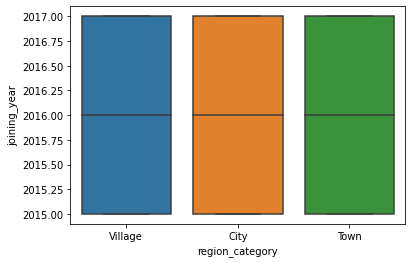

In [ ]:
# Plot boxplot between region_category and joininig year
sns.boxplot(data=data, x = 'region_category', y = 'joining_year')
plt.show()

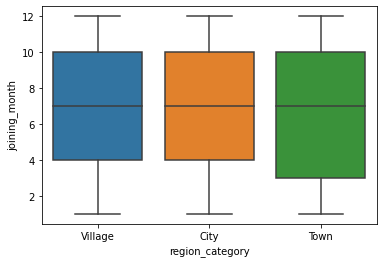

In [ ]:
# Plot boxplot between region_category and joininig month
sns.boxplot(data=data, x = 'region_category', y = 'joining_month')
plt.show()

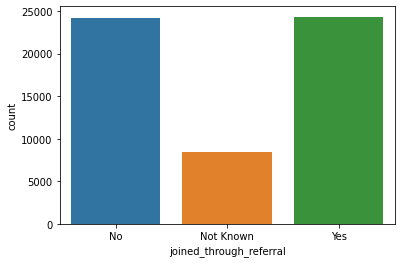

In [ ]:
# Visualising How many people have joined with referral and how many have not
sns.countplot(data=data, x = 'joined_through_referral')
plt.show()

**Although there is an equal representation of both yes and no. However, our third category has very less frequency.**

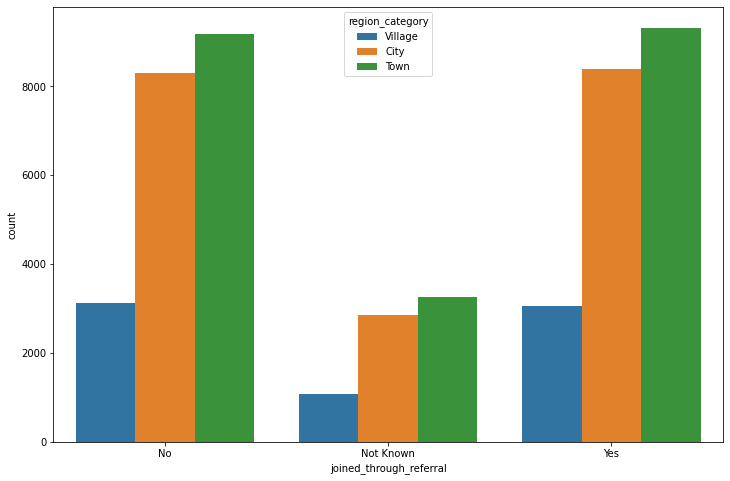

In [ ]:
# Visualise the above plot in hue with region_category
plt.figure(figsize=(12,8))
sns.countplot(data = data, x='joined_through_referral', hue = 'region_category')
plt.show()

In [ ]:
data['referral_id'].value_counts()

xxxxxxxx    27300
CID43705       13
CID63748       12
CID3979        12
CID23523       12
            ...  
CID44009        1
CID43615        1
CID49108        1
CID16162        1
CID46597        1
Name: referral_id, Length: 14369, dtype: int64

In [ ]:
data.drop(['referral_id'], axis=1, inplace = True)

In [ ]:
# Check value counts for preferred_offer_types
data['preferred_offer_types'].value_counts() 

Credit/Debit Card Offers    18876
Gift Vouchers/Coupons       18844
Without Offers              18744
Name: preferred_offer_types, dtype: int64

**Againalmost equal representation is observed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


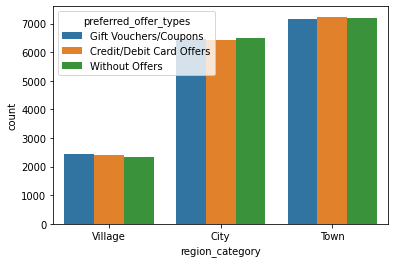

In [ ]:
# PLot region_category in hue with preferred_offer_types
sns.countplot(data['region_category'], hue = data['preferred_offer_types'])
plt.show()

**No, conclusive statement can be made**

In [ ]:
# Check value counts for medium_of_operations
data['medium_of_operation'].value_counts()

Desktop       21376
Smartphone    21281
Not Known      8357
Both           5897
Name: medium_of_operation, dtype: int64

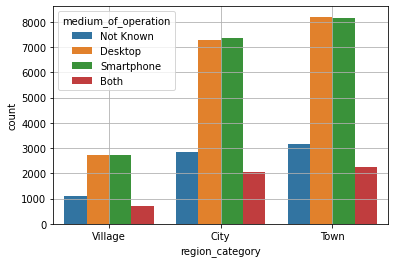

In [ ]:
sns.countplot(data = data, x = 'region_category', hue = 'medium_of_operation')
plt.grid()
plt.show()

In [ ]:
# value counts internet option
data['internet_option'].value_counts()

Wi-Fi          19012
Fiber_Optic    18983
Mobile_Data    18916
Name: internet_option, dtype: int64

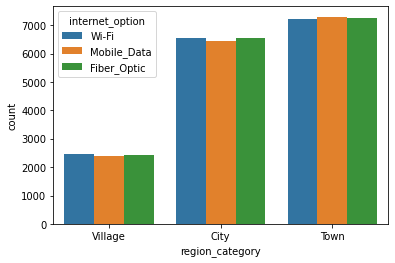

In [ ]:
sns.countplot(data = data, x = 'region_category', hue = 'internet_option')
plt.show()

In [ ]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_year,joining_month,joining_day
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Not Known,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2017,8,17
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Not Known,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,2017,8,28
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,2016,11,11
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,2016,10,29
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,2017,9,12


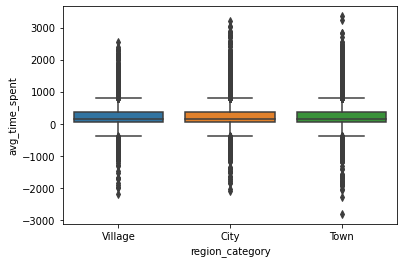

In [ ]:
sns.boxplot(data = data, x = 'region_category', y = 'avg_time_spent')
plt.show()

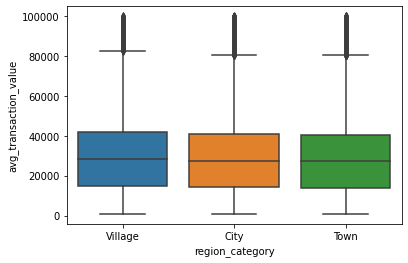

In [ ]:
sns.boxplot(data = data, x = 'region_category', y = 'avg_transaction_value')
plt.show()

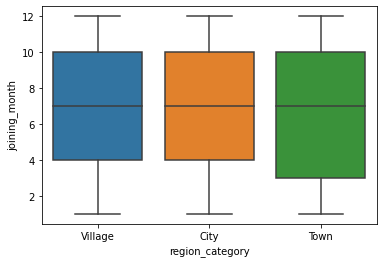

In [ ]:
sns.boxplot(data = data, x = 'region_category', y = 'joining_month')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


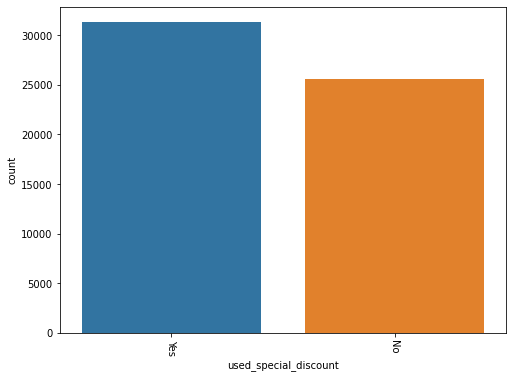

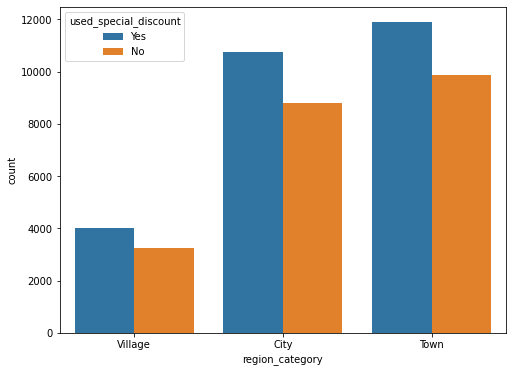

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


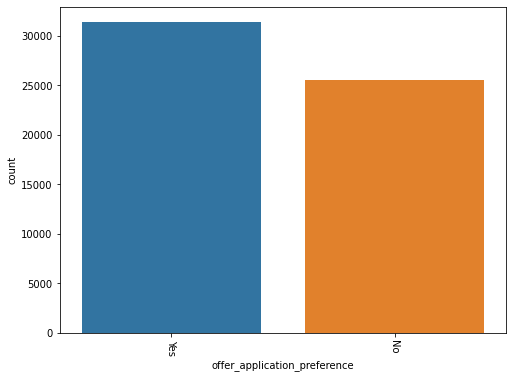

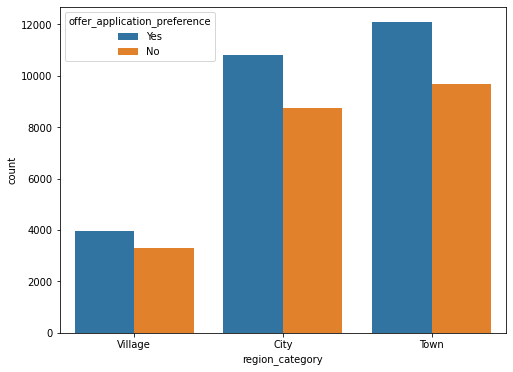

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


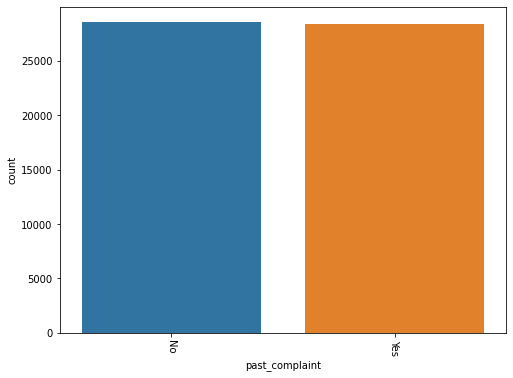

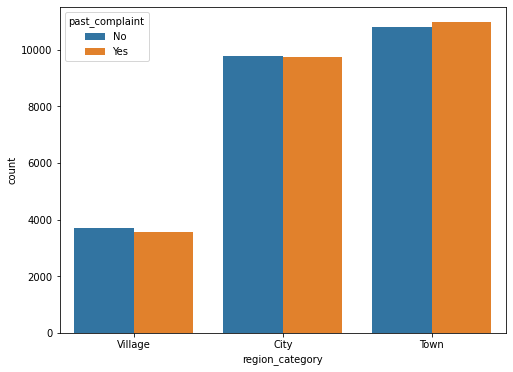

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


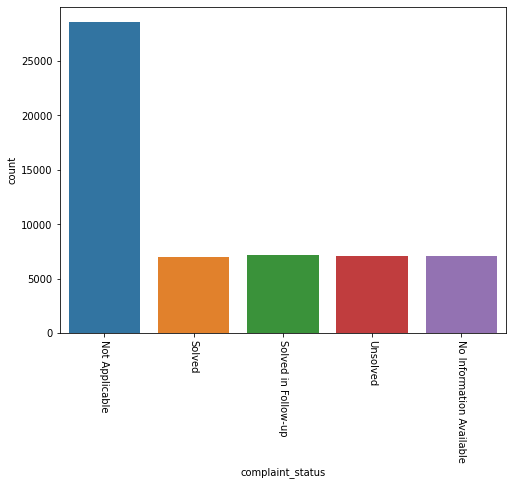

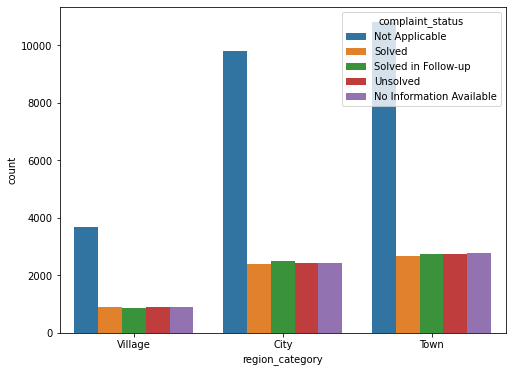

In [ ]:
# Visualise 
columns = ['used_special_discount', 'offer_application_preference',	'past_complaint',	'complaint_status']
for cols in columns:
  fig = plt.figure(figsize=(8,6))
  # Visualise each feature first followed by hue plots
  sns.countplot(data[cols])
  plt.xticks(rotation = -90)
  fig = plt.figure(figsize=(8,6))
  sns.countplot(data = data, x = 'region_category', hue = cols)
  plt.show()

In [ ]:
data['points_in_wallet'].fillna(value = data['points_in_wallet'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 8376
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types            447
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
joining_year                       0
joining_month                      0
joining_day                        0
dtype: int64

In [ ]:
data.fillna(method='ffill', inplace=True) # Fill the rest of the Null value using ffill method

In [ ]:
# Distribute the data into numerical and categorical columns
categorical_columns = [column for column in data.select_dtypes('O').columns]
numerical_columns = [column for column in data.columns if column not in categorical_columns]

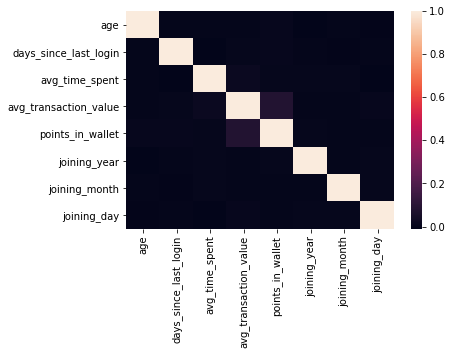

In [ ]:
# Compute the correlation between numerical values
sns.heatmap(data.corr())
plt.show()

In [ ]:
# Drop the date columns
data.drop('joining_date',axis = 1, inplace = True)

**No, correltation, i.e no multicollinearity.**

In [ ]:
#Split the data back into training and testing set
train_len = train.shape[0]

training_set = data[ : train_len] # Training features
testing_set = data[train_len : ] # testing features

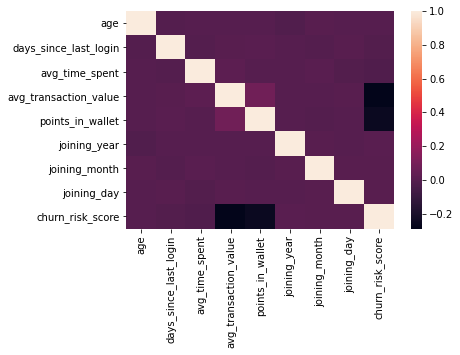

In [ ]:
# Plot correlation heatmap between the features and the target variable
sns.heatmap(pd.concat((training_set,y), axis = 1).corr())
plt.show()

* **Negative correlation is observed between churn_risk_score and avg_transaction_value and churn_risk_score and points_in_wallet.**

* **Positive correlation is observed between points_in_wallet and avg_transaction_value.**

In [ ]:
training_set.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_year,joining_month,joining_day
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,Gift Vouchers/Coupons,Not Known,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2017,8,17
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,Not Known,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,686.563762,Yes,No,Yes,Solved,Quality Customer Care,2017,8,28
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,2016,11,11
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,2016,10,29
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,2017,9,12


In [ ]:
# Using pandas Crosstab function to compute a frequency table
pd.crosstab(data['region_category'], [data['membership_category'], data['preferred_offer_types']])

membership_category           Basic Membership  ... Silver Membership
preferred_offer_types Credit/Debit Card Offers  ...    Without Offers
region_category                                 ...                  
City                                      1584  ...              1205
Town                                      1784  ...              1432
Village                                    578  ...               419

[3 rows x 18 columns]

In [ ]:
pd.crosstab(data['region_category'], data['gender'])

gender,F,M,Unknown
region_category,,,
City,11411,11368,33
Town,12813,12717,51
Village,4238,4269,11


In [ ]:
pd.crosstab(data['region_category'], data['feedback'])

feedback,No reason specified,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
region_category,,,,,,,,,
City,3972,3890,3932,3844,831,813,846,3921,763
Town,4375,4415,4352,4353,921,917,934,4390,924
Village,1366,1357,1440,1375,408,385,425,1369,393


In [ ]:
# Distribute the positive and negative factors
negative_feedback = ['Poor Customer Service', 'Poor Product Quality', 'Poor Website', 'Too many ads'] 
positive_feedback = ['Products always in Stock',	'Quality Customer Care',	'Reasonable Price', 'User Friendly Website']
neutral_feedback = ['No reason specified']

In [ ]:
data['feedback'].value_counts()

Poor Product Quality        9724
No reason specified         9713
Too many ads                9680
Poor Customer Service       9662
Poor Website                9572
Reasonable Price            2205
Products always in Stock    2160
Quality Customer Care       2115
User Friendly Website       2080
Name: feedback, dtype: int64

In [ ]:
# plot the negative and positive feedback in hue with region category

# 1. Create a columns type of feedback or feedback type
data['feedback type'] = np.full(data.shape[0],'Na')
i = 0
for idx, value in zip(data['feedback'].index, data['feedback']):
  i+=1
  # if the feedback is positive store it as "positive feedback" else store it as "negative feedback"
  if value in positive_feedback:
    data['feedback type'].loc[idx] = "Positive"
  elif value in negative_feedback:
    data['feedback type'].loc[idx] = "Negative"
  elif value in neutral_feedback:
    data['feedback type'].loc[idx] = "Neutral"

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [ ]:
data['feedback'].value_counts()

Poor Product Quality        9724
No reason specified         9713
Too many ads                9680
Poor Customer Service       9662
Poor Website                9572
Reasonable Price            2205
Products always in Stock    2160
Quality Customer Care       2115
User Friendly Website       2080
Name: feedback, dtype: int64

In [ ]:
data['feedback type'].value_counts()

Negative    38604
Neutral      9718
Positive     8589
Name: feedback type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


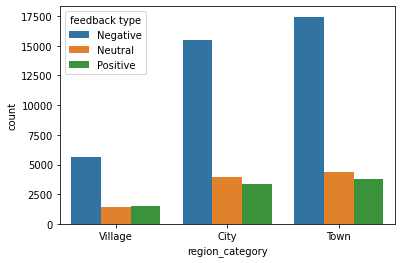

In [ ]:
# Plot region category in hue with feedback type
sns.countplot(data['region_category'], hue = data['feedback type'])
plt.show()

In [ ]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_year,joining_month,joining_day,feedback type
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,Gift Vouchers/Coupons,Not Known,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2017,8,17,Negative
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,Not Known,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,686.563762,Yes,No,Yes,Solved,Quality Customer Care,2017,8,28,Negative
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,2016,11,11,Neutral
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,2016,10,29,Negative
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,2017,9,12,Negative


In [ ]:
data.drop(['customer_id', 'Name', 'security_no'], axis = 1, inplace = True)

In [ ]:
categorical_columns_2 = [col for col in data.select_dtypes('O').columns]
numerical_columns_2 = [col for col in data.columns if col not in categorical_columns_2]

In [ ]:
# one hot encode the categorical_columns
one_hot_cols = ['joined_through_referral', 'used_special_discount',	'offer_application_preference',	'past_complaint']
for col in one_hot_cols:
  data[col] = data[col].apply(lambda x : col + " " + x)

In [ ]:
data.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_year,joining_month,joining_day,feedback type
0,18,F,Village,Platinum Membership,joined_through_referral No,Gift Vouchers/Coupons,Not Known,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.750000,used_special_discount Yes,offer_application_preference Yes,past_complaint No,Not Applicable,Products always in Stock,2017,8,17,Negative
1,32,F,City,Premium Membership,joined_through_referral Not Known,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,686.563762,used_special_discount Yes,offer_application_preference No,past_complaint Yes,Solved,Quality Customer Care,2017,8,28,Negative
2,44,F,Town,No Membership,joined_through_referral Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.690000,used_special_discount No,offer_application_preference Yes,past_complaint Yes,Solved in Follow-up,Poor Website,2016,11,11,Neutral
3,37,M,City,No Membership,joined_through_referral Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.660000,used_special_discount No,offer_application_preference Yes,past_complaint Yes,Unsolved,Poor Website,2016,10,29,Negative
4,31,F,City,No Membership,joined_through_referral No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.060000,used_special_discount No,offer_application_preference Yes,past_complaint Yes,Solved,Poor Website,2017,9,12,Negative


In [ ]:
data.drop('last_visit_time', axis = 1, inplace = True)

In [ ]:
categorical_columns_2.remove('last_visit_time')

In [ ]:
categorical_columns_2

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'feedback type']

In [ ]:
index_login_days = data[data['avg_frequency_login_days'] == 'Error'].index

In [ ]:
data.drop(index_login_days, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48063 entries, 0 to 19917
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           48063 non-null  int64  
 1   gender                        48063 non-null  object 
 2   region_category               48063 non-null  object 
 3   membership_category           48063 non-null  object 
 4   joined_through_referral       48063 non-null  object 
 5   preferred_offer_types         48063 non-null  object 
 6   medium_of_operation           48063 non-null  object 
 7   internet_option               48063 non-null  object 
 8   days_since_last_login         48063 non-null  int64  
 9   avg_time_spent                48063 non-null  float64
 10  avg_transaction_value         48063 non-null  float64
 11  avg_frequency_login_days      48063 non-null  object 
 12  points_in_wallet              48063 non-null  float64
 13  u

In [ ]:
data['avg_frequency_login_days'] = data['avg_frequency_login_days'].astype('float')

In [ ]:
categorical_columns_2.remove('avg_frequency_login_days')

In [ ]:
def dummy_encoder(data,columns):

  for col in columns:
    dummy = pd.get_dummies(data[col])
    data = pd.concat((data, dummy), axis = 1)
  return data

data = dummy_encoder(data, categorical_columns_2)

In [ ]:
data.drop(categorical_columns_2, axis = 1, inplace = True) # Drop the categorical_columns_2

In [ ]:
data.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,joining_year,joining_month,joining_day,F,M,Unknown,City,Town,Village,Basic Membership,Gold Membership,No Membership,Platinum Membership,Premium Membership,Silver Membership,joined_through_referral No,joined_through_referral Not Known,joined_through_referral Yes,Credit/Debit Card Offers,Gift Vouchers/Coupons,Without Offers,Both,Desktop,Not Known,Smartphone,Fiber_Optic,Mobile_Data,Wi-Fi,used_special_discount No,used_special_discount Yes,offer_application_preference No,offer_application_preference Yes,past_complaint No,past_complaint Yes,No Information Available,Not Applicable,Solved,Solved in Follow-up,Unsolved,No reason specified,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website,Negative,Neutral,Positive
0,18,17,300.63,53005.25,17.0,781.750000,2017,8,17,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,32,16,306.34,12838.38,10.0,686.563762,2017,8,28,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,44,14,516.16,21027.00,22.0,500.690000,2016,11,11,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,37,11,53.27,25239.56,6.0,567.660000,2016,10,29,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,31,20,113.13,24483.66,16.0,663.060000,2017,9,12,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# StandardScaler object
ss = StandardScaler()

for col in data.columns:
  data[col] = ss.fit_transform(data[col].values.reshape((-1,1)))

In [ ]:
training_set = data[ : train_len] # Split the data into training_set and testing_set
testing_set = data[train_len : ]

# Machine Learnig Model

In [ ]:
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Model Object
feature_selection_model = SelectFromModel(Lasso(alpha = 0.005, random_state=0))

# Fit the model
feature_selection_model.fit(training_set, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
important_features = data.columns[feature_selection_model.get_support()]

In [ ]:
# Using only the important features
data = data[important_features]
training_set = training_set[important_features]
testing_set = testing_set[important_features]

In [ ]:
training_set.shape, testing_set.shape

((36992, 23), (11071, 23))

In [ ]:
# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(training_set, y, test_size = 0.2) # Full training set and testing set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.1) # Training set and validation set

In [ ]:
# Linear Model
from sklearn.linear_model import LogisticRegression

# Model Object
lr = LogisticRegression(penalty='l2')

# Fit the model
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import f1_score

# make predicitons
preds = lr.predict(X_valid)
# Compute f1_score
f1_score(y_valid, preds, average = "macro")

0.14443165395534696

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

preds = dt.predict(X_valid)
f1_score(y_valid, preds, average='macro')

0.17695542983757093

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)
preds = rf_clf.predict(X_valid)
f1_score(y_valid, preds, average='macro')

0.15334205282365418